                    WHO SUICIDE's STATISTICS EDA                      

Importing neccessary libraries and Dataset for EDA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('who_suicide_statistics.csv',encoding='Utf-8')

Strurcture of Data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   country      43776 non-null  object  
 1   year         43776 non-null  int64   
 2   sex          43776 non-null  category
 3   age          43776 non-null  category
 4   suicide_num  41520 non-null  float64 
 5   population   38316 non-null  float64 
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 1.4+ MB


In [25]:
df.shape

(43776, 6)

In [26]:
df.describe()

,year,suicide_num,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [27]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicide_num', 'population'], dtype='object')

In [34]:
df.head(10)

,country,year,sex,age,suicide_num,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


Data Preprocessing and Data Cleaning.

In [23]:
# Renaming the suicide_no column to suicide_num
df.rename(columns={'suicides_no':'suicide_num'},inplace=True)

In [29]:
# checking the data types of columns.
df.dtypes

country          object
year              int64
sex            category
age            category
suicide_num     float64
population      float64
dtype: object

In [30]:
# Converting the data types of columns.
df['sex']=df['sex'].astype('category')
df['age']=df['age'].astype('category')

In [31]:
# checking for duplicate values in dataset.
df.duplicated().any()
# No duplicate values in our dataset.

np.False_

In [32]:
# checking for missing values .
df.isnull().sum()

country           0
year              0
sex               0
age               0
suicide_num    2256
population     5460
dtype: int64

In [36]:
# we have two columns in our dataset suicide_num and population.

# 1. The suicide_num can be 0 if no values are written in it means their is no suicides for that year in that country.
df['suicide_num'].fillna(0,inplace=True)

# 2. the population data for a country in the same year will also be same so we can fill our null values by the previous and later data rows .
df['population']=df.groupby(['country','year'])['population'].transform(lambda x:x.ffill().bfill())

C:\Users\Anshul Sharma\AppData\Local\Temp\ipykernel_10520\3393242083.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['suicide_num'].fillna(0,inplace=True)


In [39]:
df.isnull().sum()

country           0
year              0
sex               0
age               0
suicide_num       0
population     5460
dtype: int64

From above data we can see that after filling the null values their are some rows or can say countries which have no population values 
so for that we will download the population dataset from externally and use it for filling the missing population values.

In [ ]:
# list of countries which have no data of population.
no_population_countries = df.groupby('country')['population'].apply(lambda x: x.isnull().all())
no_population_countries = no_population_countries[no_population_countries].index.tolist()
print(no_population_countries)


['Anguilla', 'Bolivia', 'British Virgin Islands', 'Dominican Republic', 'Falkland Islands (Malvinas)', 'Haiti', 'Honduras', 'Iraq', 'Jordan', 'Malaysia', 'Monaco', 'Montserrat', 'Morocco', 'Netherlands Antilles', 'Occupied Palestinian Territory', 'Peru', 'Saint Pierre and Miquelon', 'Saudi Arabia', 'Syrian Arab Republic', 'Tajikistan', 'Tunisia', 'Turks and Caicos Islands', 'Zimbabwe']


Importing the new dataset population.csv for filling the missing values of population in pop_df dataframe

In [ ]:

pop_df=pd.read_csv('population.csv')
pop_df.head()

,Country Name,Country Code,Year,Value
0,Aruba,ABW,1960,54922.0
1,Aruba,ABW,1961,55578.0
2,Aruba,ABW,1962,56320.0
3,Aruba,ABW,1963,57002.0
4,Aruba,ABW,1964,57619.0


In [ ]:
# Dropping the unnecessary columns from dataset.
pop_df.drop(columns=['Country Code'], inplace=True)

In [ ]:
# Renaming the columns 
pop_df.rename(columns={'Country Name': 'country'}, inplace=True)
pop_df.rename(columns={'Year': 'year'}, inplace=True)



In [ ]:
# making new dataframe by merging both the dataframe df and population dataframe.
updated_df = pd.merge(
    df,
    pop_df,
    on=['country', 'year'],
    how='left',
    suffixes=('', '_pop')
)

In [ ]:
# filling the missing values of population in updated df.
updated_df['population'] = updated_df['population'].fillna(updated_df['Value'])


In [ ]:
# removing the unnecessary columns from new updated df
updated_df.drop(columns=['Value'], inplace=True)


Checking the structure of updated_df.

In [70]:
updated_df.head()

,country,year,sex,age,suicide_num,population
0,Albania,1985,female,15-24 years,0.0,277900.0
1,Albania,1985,female,25-34 years,0.0,246800.0
2,Albania,1985,female,35-54 years,0.0,267500.0
3,Albania,1985,female,5-14 years,0.0,298300.0
4,Albania,1985,female,55-74 years,0.0,138700.0


In [72]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   country      43776 non-null  object  
 1   year         43776 non-null  int64   
 2   sex          43776 non-null  category
 3   age          43776 non-null  category
 4   suicide_num  43776 non-null  float64 
 5   population   42360 non-null  float64 
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
# Checking the null values.
updated_df.isnull().sum()
# their are stiil some missing values in population. (less than before)

country           0
year              0
sex               0
age               0
suicide_num       0
population     1416
dtype: int64

In [ ]:
# trying to fill the missing values of population.
updated_df['population']=updated_df.groupby(['country','year'])['population'].transform(lambda x:x.ffill().bfill())

In [ ]:
# checking for missing values again still no values are filled .
updated_df.isnull().sum()

country           0
year              0
sex               0
age               0
suicide_num       0
population     1416
dtype: int64

In [ ]:
# still some countries have missing values of population .
# list of countries.
no_population_countries = updated_df.groupby('country')['population'].apply(lambda x: x.isnull().all())
no_population_countries = no_population_countries[no_population_countries].index.tolist()
print(no_population_countries)

['Anguilla', 'Falkland Islands (Malvinas)', 'Montserrat', 'Netherlands Antilles', 'Occupied Palestinian Territory', 'Saint Pierre and Miquelon']


In [78]:
updated_df.shape

(43776, 6)

Their are more than 43k rows in data but only 1416 rows have missing values .
So we are dropping thode null values rows .

In [79]:
# dropping the null values rows .
updated_df.dropna(inplace=True)

In [81]:
# checking for duplocate values in updated_df
updated_df.duplicated().sum()

np.int64(0)

No duplicated values in updated_df 

In [82]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42360 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   country      42360 non-null  object  
 1   year         42360 non-null  int64   
 2   sex          42360 non-null  category
 3   age          42360 non-null  category
 4   suicide_num  42360 non-null  float64 
 5   population   42360 non-null  float64 
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 1.7+ MB


                            VISUALIZATION                           

1. What is the suicide trend over the years globally?

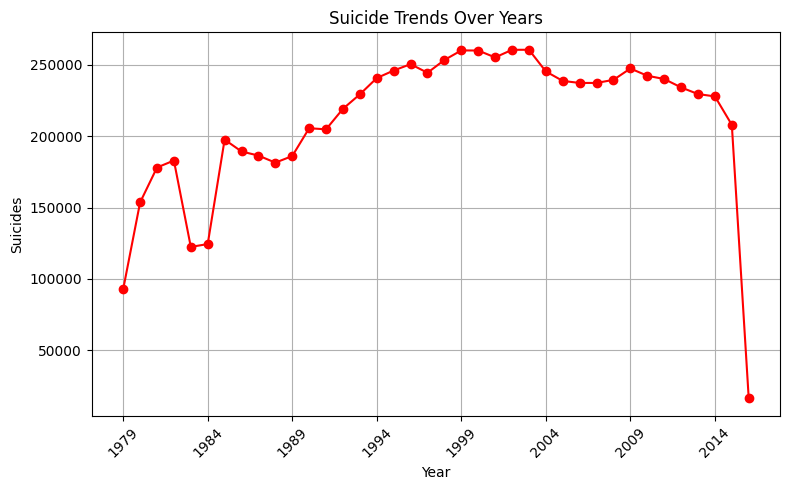

In [100]:
plt.figure(figsize=(8,5))
suicide_trends=updated_df.groupby('year')['suicide_num'].sum()
plt.plot(suicide_trends.index,suicide_trends.values,color='red',marker='o')

year_ticks = np.arange(suicide_trends.index.min(), suicide_trends.index.max()+1, 5)
plt.xticks(year_ticks, rotation=45)

plt.xlabel('Year')
plt.ylabel('Suicides')
plt.title("Suicide Trends Over Years")
plt.grid(True)
plt.tight_layout()
plt.show()

The line is showing that after 2014 the cases of suicides are drastically reduced. 

2. Which countries have the highest suicide numbers overall?

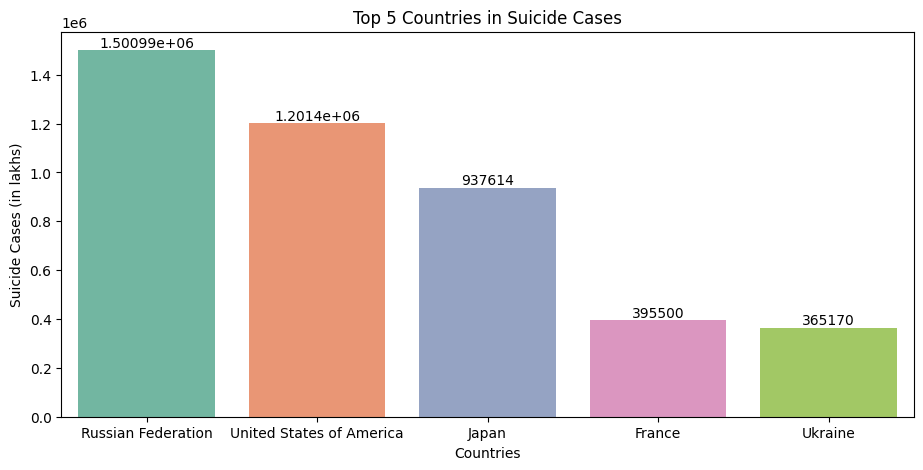

In [109]:
plt.figure(figsize=(11,5))

country_suicide=updated_df.groupby('country')['suicide_num'].sum().sort_values(ascending=False).head(5)

cs=sns.barplot(x=country_suicide.index,y=country_suicide.values,hue=country_suicide.index,legend=False,palette='Set2')

for container in cs.containers:
    cs.bar_label(container,label_type='edge')

plt.xlabel('Countries')
plt.ylabel('Suicide Cases (in lakhs)')
plt.title("Top 5 Countries in Suicide Cases")
plt.show()

We can See that the Russian Federation has the highest number of cases in suicides from 1979 to 2016

3. What is the suicide distribution by sex?

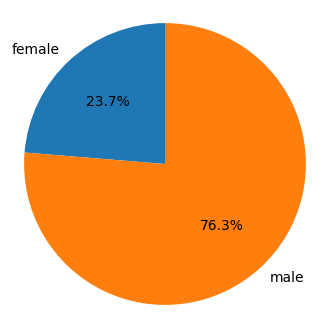

In [115]:
sd=updated_df.groupby('sex',observed=True)['suicide_num'].sum()

plt.figure(figsize=(4,4))
plt.pie(sd,labels=sd.index,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()

The suicides are attempted by the males 3/4 times more than Females.

4. Which age groups are most vulnerable to suicide?

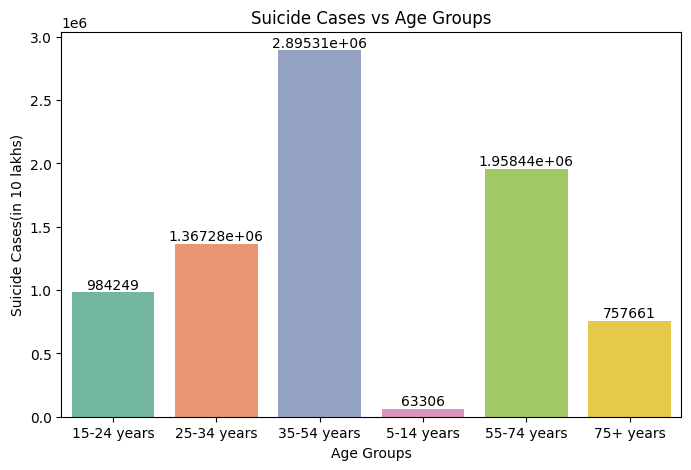

In [119]:
age_grp=updated_df.groupby('age',observed=True)['suicide_num'].sum()
plt.figure(figsize=(8,5))
age_grp_sc=sns.barplot(x=age_grp.index,y=age_grp.values,hue=age_grp.index,legend=False,palette='Set2')

for conatiner in age_grp_sc.containers:
    age_grp_sc.bar_label(conatiner,label_type='edge')

plt.title('Suicide Cases vs Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Suicide Cases(in 10 lakhs)')
plt.show()

The Age Group of 35-54 years have highest number of suicide cases .

5. What is the suicide rate per 100,000 population over the years?

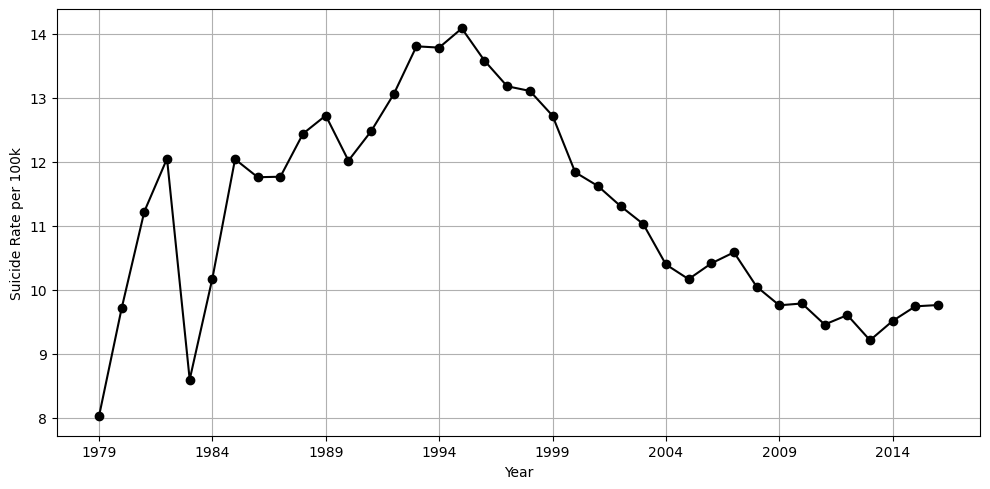

In [140]:
updated_df['suicide_rate'] = (updated_df['suicide_num'] / updated_df['population']) * 100000
rate_by_year = updated_df.groupby('year')['suicide_rate'].mean()

plt.figure(figsize=(10,5))
plt.plot(rate_by_year.index,rate_by_year.values,color='black',marker='o')

plt.xticks(ticks=range(rate_by_year.index.min(), rate_by_year.index.max() + 1, 5))

plt.xlabel('Year')
plt.ylabel('Suicide Rate per 100k')
plt.grid(True)
plt.tight_layout()
plt.show()
